In [61]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots



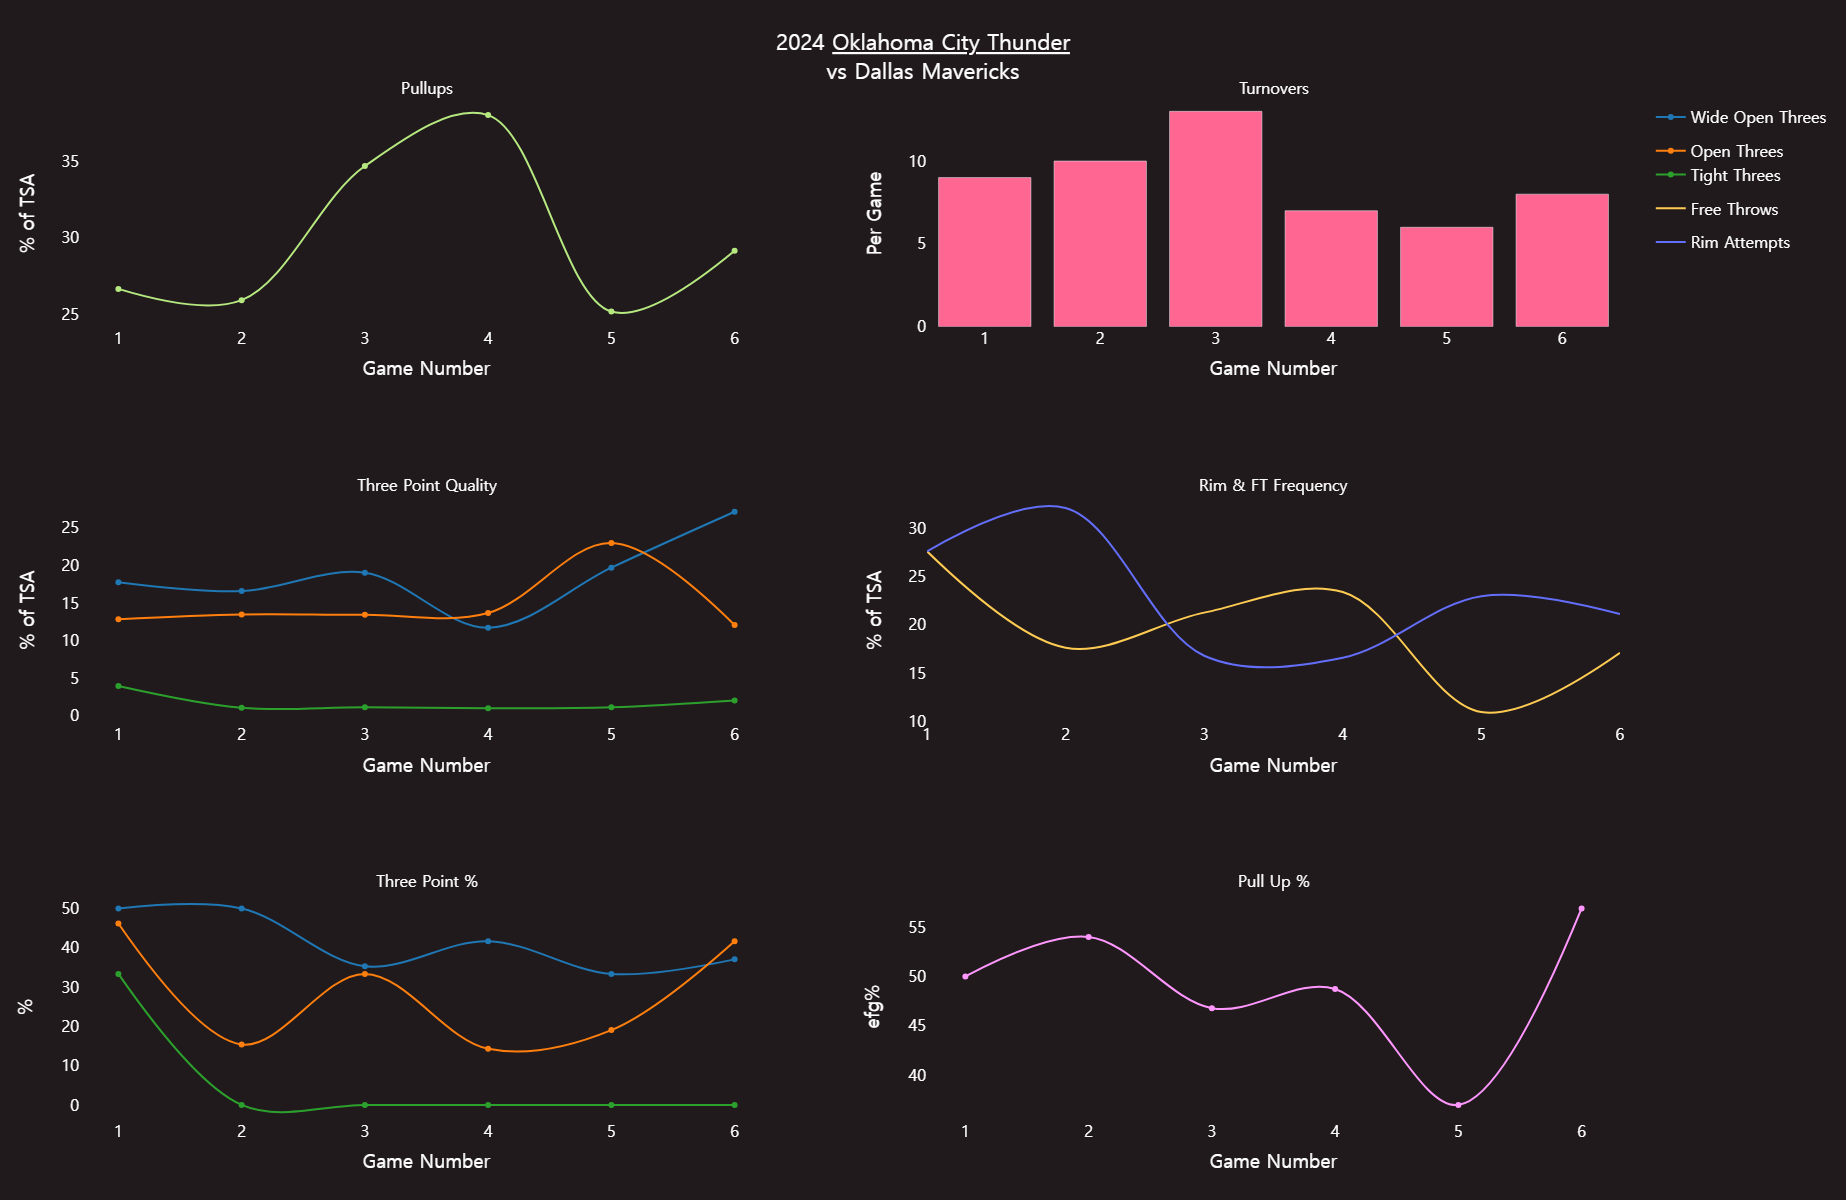

In [112]:
file_name='OKC_DAL_2024'
df =pd.read_csv('data/'+file_name+'.csv')

series_data=df.groupby(['TEAM_ID','date']).sum(numeric_only=True)[['very_tight_FG3A','wide_open_FG3A','open_FG3A','tight_FG3A','very_tight_FG3M','wide_open_FG3M','open_FG3M','tight_FG3M',
                                                                   'FGA','FTA','PULL_UP_FGA','PULL_UP_FGM','PULL_UP_FG3M','DRIVES','POTENTIAL_AST','TOV','RA_FGA']].reset_index()

series_data['game_number']=[i for i in range(1, len(series_data)+1)]

series_data['rimfga']=series_data['RA_FGA']
series_data['TSA']=series_data['FGA']+(series_data['FTA']*.44)
series_data['ft_freq']=100* series_data['FTA']/series_data['TSA']

series_data['rim_freq']=100* series_data['rimfga']/series_data['TSA']
series_data['pullup_freq']=100* series_data['PULL_UP_FGA']/series_data['TSA']

series_data['open_FG3_freq']=100* series_data['open_FG3A']/series_data['TSA']
series_data['tight_FG3_freq']=100* (series_data['tight_FG3A']+series_data['very_tight_FG3A'])/series_data['TSA']
series_data['wide_open_FG3_freq']=100* series_data['wide_open_FG3A']/series_data['TSA']

series_data['pullup_fg%']=100* series_data['PULL_UP_FGM']/series_data['PULL_UP_FGA']

series_data['PULL_UP_EFG'] =100* (series_data['PULL_UP_FGM'] + 0.5 * series_data['PULL_UP_FG3M']) / series_data['PULL_UP_FGA']


series_data['open_FG3%']=100* series_data['open_FG3M']/series_data['open_FG3A']
series_data['tight_FG3%']=100* series_data['tight_FG3M']/series_data['tight_FG3A']
series_data['wide_open_FG3%']=100* series_data['wide_open_FG3M']/series_data['wide_open_FG3A']

def convert_to_full_team_names(team_string):
    # Dictionary mapping abbreviations to full NBA team names
    team_map = {
        'ATL': 'Atlanta Hawks',
        'BOS': 'Boston Celtics',
        'BKN': 'Brooklyn Nets',
        'CHA': 'Charlotte Hornets',
        'CHI': 'Chicago Bulls',
        'CLE': 'Cleveland Cavaliers',
        'DAL': 'Dallas Mavericks',
        'DEN': 'Denver Nuggets',
        'DET': 'Detroit Pistons',
        'GSW': 'Golden State Warriors',
        'HOU': 'Houston Rockets',
        'IND': 'Indiana Pacers',
        'LAC': 'Los Angeles Clippers',
        'LAL': 'Los Angeles Lakers',
        'MEM': 'Memphis Grizzlies',
        'MIA': 'Miami Heat',
        'MIL': 'Milwaukee Bucks',
        'MIN': 'Minnesota Timberwolves',
        'NOP': 'New Orleans Pelicans',
        'NYK': 'New York Knicks',
        'OKC': 'Oklahoma City Thunder',
        'ORL': 'Orlando Magic',
        'PHI': 'Philadelphia 76ers',
        'PHX': 'Phoenix Suns',
        'POR': 'Portland Trail Blazers',
        'SAC': 'Sacramento Kings',
        'SAS': 'San Antonio Spurs',
        'TOR': 'Toronto Raptors',
        'UTA': 'Utah Jazz',
        'WAS': 'Washington Wizards'
    }


    # Split the input string into parts (team abbreviations and year)
    parts = team_string.split('_')

    # Extract team abbreviations (OKC, DAL) and ignore the year (2024)
    teams = parts[:-1]
    
    # Get the full team names using the dictionary
    full_team_names = [team_map.get(team, team) for team in teams]

    # Underline the first team name and join the rest with <br>
    full_team_names[0] = f"<span style='text-decoration:underline;'>{full_team_names[0]}</span>"

    full_team_names[0]= parts[-1]+' '+ full_team_names[0]


    full_team_names[1]= 'vs ' +full_team_names[1]
    
    
    # Join the full names with <br> and return
    return '<br>'.join(full_team_names)

fig = make_subplots(rows=3, cols=2, subplot_titles=(
        "Pullups",

    "Turnovers",
    "Three Point Quality",
    "Rim & FT Frequency",
        "Three Point %",
    "Pull Up %"
))

# 1. Line Chart for Wide Open Three Point Shots
fig.add_trace(
    go.Scatter(x=series_data['game_number'], y=series_data['wide_open_FG3_freq'],
               mode='lines+markers', name='Wide Open Threes',line=dict(shape='spline',width=2,color='#1f77b4')),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=series_data['game_number'], y=series_data['open_FG3_freq'],legendgroup='threes',
               mode='lines+markers', name='Open Threes',line=dict(shape='spline',width=2,color='#ff7f0e')),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=series_data['game_number'], y=series_data['tight_FG3_freq'],legendgroup='threes',
               mode='lines+markers', name='Tight Threes',line=dict(shape='spline',width=2,color='#2ca02c')),
    row=2, col=1
)



fig.add_trace(
    go.Scatter(x=series_data['game_number'], y=series_data['wide_open_FG3%'],showlegend=False,
               mode='lines+markers', name='Wide Open %',line=dict(shape='spline',width=2,color='#1f77b4')),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=series_data['game_number'], y=series_data['open_FG3%'],showlegend=False,
               mode='lines+markers', name='Open %',line=dict(shape='spline',width=2,color='#ff7f0e')),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=series_data['game_number'], y=series_data['tight_FG3%'],showlegend=False,
               mode='lines+markers', name='Tight %',line=dict(shape='spline',width=2,color='#2ca02c')),
    row=3, col=1
)

# 2. Bar Chart for Turnovers
fig.add_trace(
    go.Bar(x=series_data['game_number'], y=series_data['TOV'], name='Turnovers',showlegend=False),
    row=1, col=2
)

# 3. Spline Chart for Rim Attempts
fig.add_trace(
    go.Scatter(x=series_data['game_number'], y=series_data['pullup_freq'],showlegend=False,
               mode='lines+markers', name='Pullups', line=dict(shape='spline',width=2)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=series_data['game_number'], y=series_data['PULL_UP_EFG'],showlegend=False,
               mode='lines+markers', name='Pullups', line=dict(shape='spline',width=2)),
    row=3, col=2
)
# 4. Multi-line Chart comparing Wide Open Threes and Rim Attempts
fig.add_trace(
    go.Scatter(x=series_data['game_number'], y=series_data['ft_freq'],
               mode='lines', name='Free Throws',line=dict(shape='spline',width=2)),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=series_data['game_number'], y=series_data['rim_freq'],
               mode='lines', name='Rim Attempts',line=dict(shape='spline',width=2)),
    row=2, col=2
)

# Update layout
fig.update_layout(height=1200, width=1200, title_text=convert_to_full_team_names(file_name),title_x=.5,title_font_size=22,
                  paper_bgcolor='#211a1d',plot_bgcolor='#211a1d', font=dict(
            family="Malgun Gothic",
                      size=16,
            color="#ffffff"
            ))
tickvals=[i for i in range(1,series_data['game_number'].max()+1)]
fig.update_yaxes(title_text="% of TSA",row=2,col=1,showgrid=False)
fig.update_yaxes(title_text="% of TSA",row=1,col=1,showgrid=False)

fig.update_yaxes(title_text="efg%",row=3,col=2,showgrid=False)

fig.update_yaxes(title_text="%",row=3,col=1,showgrid=False)

fig.update_yaxes(title_text="Per Game",row=1,col=2,showgrid=False)

fig.update_annotations(font_size=16)
fig.update_yaxes(title_text="% of TSA",row=2,col=2,showgrid=False)
fig.update_xaxes(title_text="Game Number",showgrid=False,tickvals=tickvals,showline=False,zeroline=False)
fig.update_yaxes(zeroline=False)
# Show the plot
fig.show()


In [89]:
for col in df.columns:
    if 'pull_up' in col.lower():
        print(col)

PULL_UP_FG3M
PULL_UP_FGM
PULL_UP_FG3A
PULL_UP_FG3_PCT
PULL_UP_PTS
PULL_UP_FG_PCT
PULL_UP_FGA
PULL_UP_EFG_PCT


In [9]:
print (len(df.columns))

324
